In [108]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [109]:
# !kaggle datasets download -d yasserh/twitter-tweets-sentiment-dataset

In [110]:
# # unzipped the dataset
# import zipfile
# zip_ref=zipfile.ZipFile('/content/twitter-tweets-sentiment-dataset.zip','r')
# zip_ref.extractall('/content')
# zip_ref.close()

### import necessary libraries

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load datasets

In [112]:
df=pd.read_csv('../dataset/tweets.csv')
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [113]:
df.drop(columns={'textID','selected_text'},inplace=True)
df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [114]:
df.shape

(27481, 2)

In [115]:
df.isnull().sum()

text         1
sentiment    0
dtype: int64

In [116]:
df.dropna(inplace=True)

In [117]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27480 non-null  object
 1   sentiment  27480 non-null  object
dtypes: object(2)
memory usage: 644.1+ KB


In [119]:
df.describe()

,text,sentiment
count,27480,27480
unique,27480,3
top,All this flirting going on - The ATG smiles...,neutral
freq,1,11117


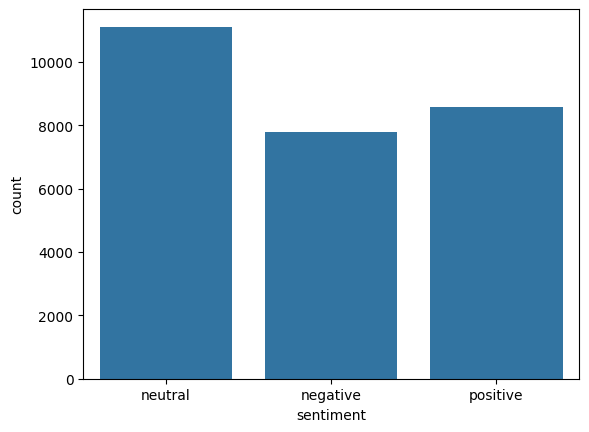

In [120]:
sns.countplot(x='sentiment',data=df)
plt.show()

### data preprocessing

In [121]:
import re
import nltk
import contractions
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/keskhanal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [122]:
def text_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [123]:
# cleaned_text_data = []  # list of cleaned tweets
# for txt in df['text']:
#   txt=txt.replace('`',"'")

#   cleaned_text_data.append(text_cleaner_without_stopwords(txt))

In [124]:
df["cleaned_tweet"] = df["text"].apply(text_cleaner_without_stopwords)
df.head()

,text,sentiment,cleaned_tweet
0,"I`d have responded, if I were going",neutral,i d have responded if i were going
1,Sooo SAD I will miss you here in San Diego!!!,negative,sooo sad i will miss you here in san diego
2,my boss is bullying me...,negative,my bos is bullying me
3,what interview! leave me alone,negative,what interview leave me alone
4,"Sons of ****, why couldn`t they put them on t...",negative,son of why couldn t they put them on the relea...


### Exploratory Data Analysis

          Sentiment Variable Distribution          


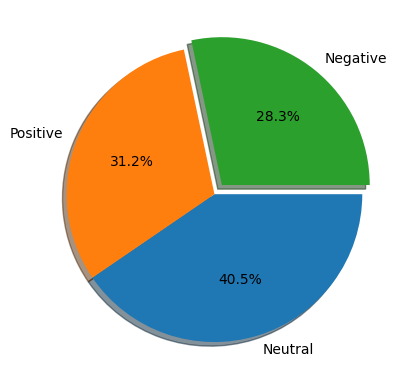

In [125]:
print('\033[1mSentiment Variable Distribution'.center(55))
plt.pie(df["sentiment"].value_counts(), labels=['Neutral','Positive','Negative'], counterclock=False, shadow=True, 
        explode=[0,0,0.08], autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

In [126]:
from wordcloud import WordCloud

def draw_wordcloud(tweet_type):
    wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
    
    tweet_sentiment = wc.generate(df[df['sentiment']==tweet_type]['cleaned_tweet'].str.cat(sep=" "))
    
    plt.figure(figsize=(15,10))
    plt.imshow(tweet_sentiment)
    plt.axis("off")
    plt.show()


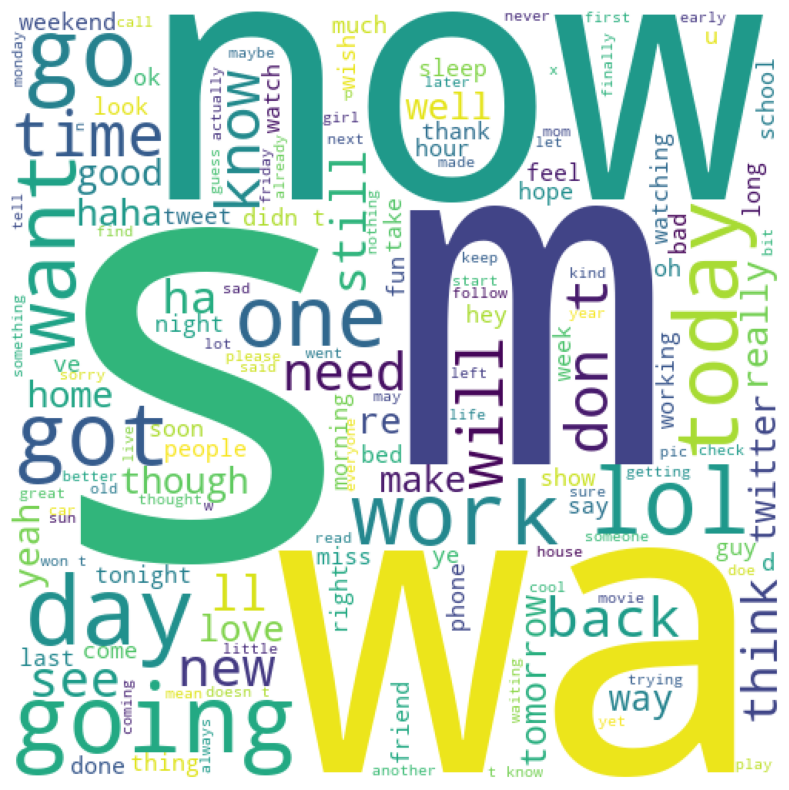

In [127]:
# for neutral sentiment
draw_wordcloud("neutral")

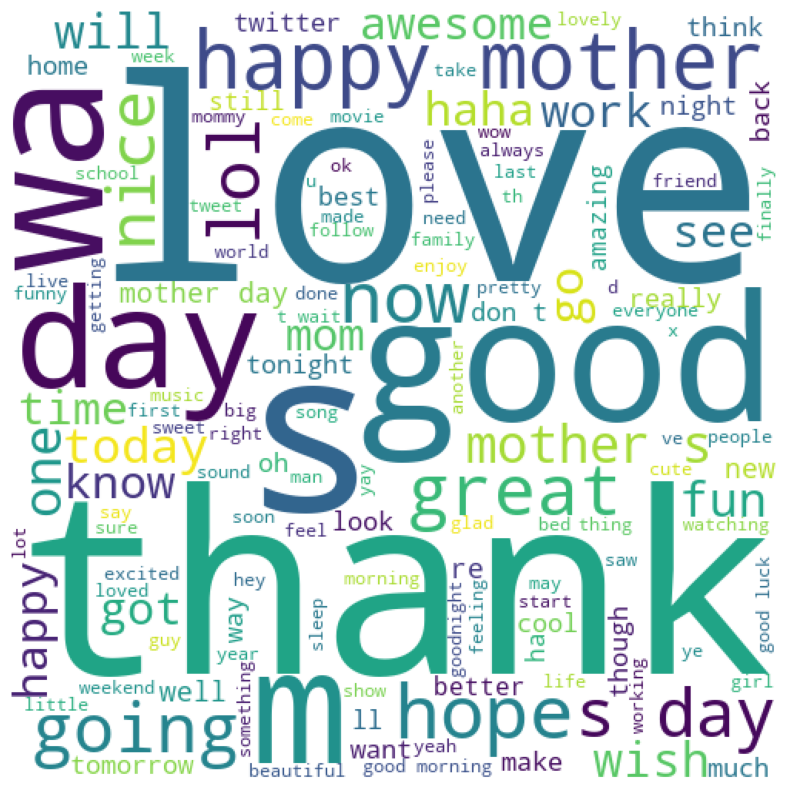

In [128]:
# for positive sentiment
draw_wordcloud("positive")

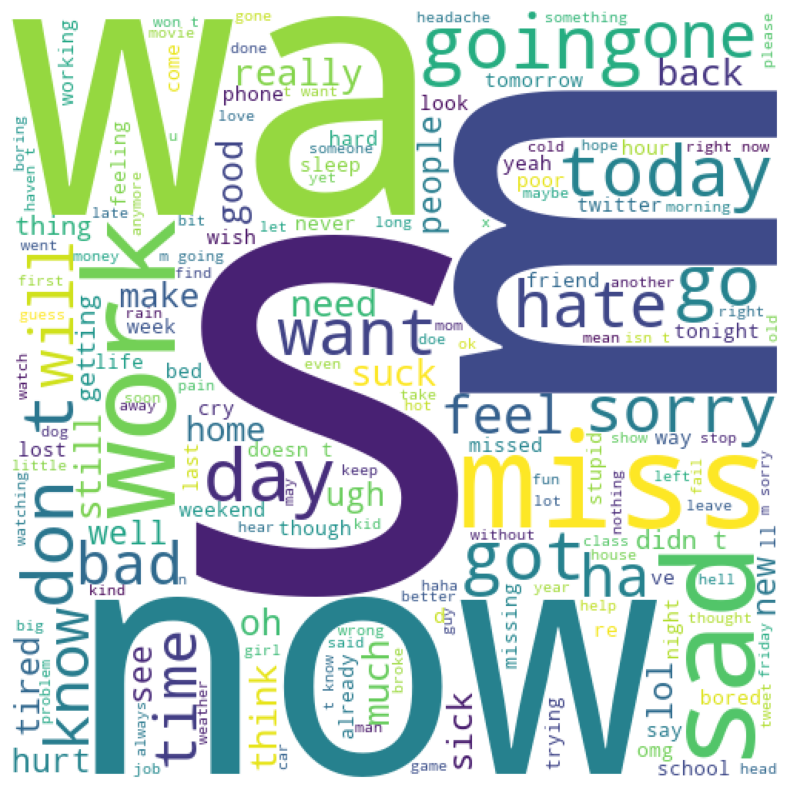

In [129]:
# for negative sentiment
draw_wordcloud("negative")

### spliting the dataset

In [130]:
# converting the target columns in the numerical form using labelencoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['sentiment']=encoder.fit_transform(df['sentiment'])
df.head()

,text,sentiment,cleaned_tweet
0,"I`d have responded, if I were going",1,i d have responded if i were going
1,Sooo SAD I will miss you here in San Diego!!!,0,sooo sad i will miss you here in san diego
2,my boss is bullying me...,0,my bos is bullying me
3,what interview! leave me alone,0,what interview leave me alone
4,"Sons of ****, why couldn`t they put them on t...",0,son of why couldn t they put them on the relea...


In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df["cleaned_tweet"], df["sentiment"], test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((21984,), (5496,))

In [132]:
X_train.head()

21209    oh he s hilarious i m just commenting on the f...
18265    thanks for trying i wa hoping bud trillin but ...
9684     after show at our house rocked saying goodbye ...
9689     up at am west coast time gettin ready to catch...
22728    my computer is so slooowww this morning i thin...
Name: cleaned_tweet, dtype: object

In [133]:
# vectorization of the data
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_features=3050)
tfidf.fit(X_train)

TfidfVectorizer(max_features=3050)

In [134]:
X_train_v = tfidf.transform(X_train)
X_test_v = tfidf.transform(X_test)

In [135]:
print(X_train_v.shape)
print(X_test_v.shape)

(21984, 3050)
(5496, 3050)


In [136]:
from sklearn.svm import LinearSVC
classifier = LinearSVC(random_state=1)
classifier.fit(X_train_v, y_train)

/home/keskhanal/anaconda3/envs/nlp/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(random_state=1)

In [137]:
y_pred=classifier.predict(X_test_v)
y_pred

array([2, 1, 1, ..., 1, 1, 1])

In [138]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

def plot_confusion_matrix(conf_matrix):
    """Plots confusion matrix.
    
    Args:
        conf_matrix (list): Array containing values as in the format returned
                            by 'sklearn.metrics.confusion_matrix'
                            
    Returns:
        Nothing
    """
    
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()    

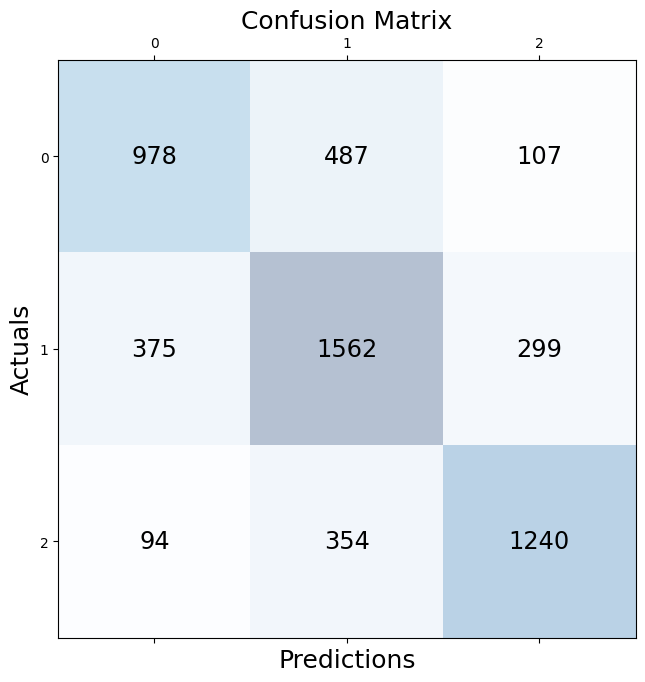

              precision    recall  f1-score   support

           0       0.68      0.62      0.65      1572
           1       0.65      0.70      0.67      2236
           2       0.75      0.73      0.74      1688

    accuracy                           0.69      5496
   macro avg       0.69      0.69      0.69      5496
weighted avg       0.69      0.69      0.69      5496



In [139]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

print(classification_report(y_test, y_pred))

use hyperparameter tuning methods like gridSearchCV or RandomSearchCV to increase the accuracy of the model also test with other algorithms too

### save model

In [140]:
import pickle

pickle.dump(classifier, open('../models/sentiment_model.pkl', 'wb'))
pickle.dump(tfidf, open('../models/vectorizers.pkl','wb'))